# One-to-one correspondence between Dyck paths and planar rooted trees using level traversal

A *Dyck path* of length $2n$ is a path consisting of $n$ up steps ```'U'``` along $(1,1)$ and $n$ down steps ```'D'``` along $(1,-1)$ that starts at the origin $(0,0)$, ends at $(2n,0)$ and never goes below the x-axis (i.e., it stays in the first quadrant). A Dyck path can therefore expressed as a Dyck code. For example, one possible Dyck path of length $6$ is ```'UDUUDD'```.

Notice that a Dyck code is the same thing as a sequence of ```enqueue``` operations ```'E'``` and ```dequeue``` operations ```'D'``` of a queue. This is the most essential point in our construction.

A planar rooted tree is a tree with a special node, namely the *root* of this tree and a total order on the set of children for each node.

<svg width="400" height="170">
  <rect x="0" y="0" width="100%" height="100%" fill="#fff"/>
  <line x1="50%" y1="60" x2="50%" y2="20" stroke="#000" stroke-width="2"/>
  <line x1="50%" y1="20" x2="35%" y2="60" stroke="#000" stroke-width="2"/>
  <line x1="50%" y1="20" x2="65%" y2="60" stroke="#000" stroke-width="2"/>
  <line x1="50%" y1="20" x2="65%" y2="60" stroke="#000" stroke-width="2"/>
  <line x1="65%" y1="60" x2="80%" y2="100" stroke="#000" stroke-width="2"/>
  <line x1="50%" y1="60" x2="50%" y2="100" stroke="#000" stroke-width="2"/>
  <line x1="50%" y1="100" x2="35%" y2="140" stroke="#000" stroke-width="2"/>
  <line x1="50%" y1="100" x2="65%" y2="140" stroke="#000" stroke-width="2"/>
  <rect x="47.5%" y="10" width="20" height="20" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="35%" cy="60" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="50%" cy="60" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="65%" cy="60" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="50%" cy="100" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="80%" cy="100" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="35%" cy="140" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
  <circle cx="65%" cy="140" r="10" stroke="#000" stroke-width="2" fill="#fff"/>
</svg>

The *one-to-one correspondence* between Dyck codes of length $2n$ and planar rooted trees of $n+1$ nodes (including the root node) is given by the *level traversal* of the tree:
- Given a planar rooted tree, preparing a recording string ```visitingRecord``` and starting from the root node, we visit all the nodes by the following algorithm:

    ```python

    queue = Queue()
    currentNode = root
    while True:
        for child in currentNode.children:
            queue.enqueue(child)
            visitingRecord += 'E'
        if queue.isEmpty():
            break
        currentNode = queue.dequeue()
        visitingRecord += 'D'

    print(visitingRecord)

    ```
    
   The final record after the whole process will be a sequence like ```visitingRecord = 'EEEDDEDEDEEDDD'```, which is a Dyck code by the easy observations that,
     * One must enqueue a node before dequeue it
     * One must dequeue a node after enqueue it
     
- Given a Dyck code like ```DyckCode = 'EEEDDEDEDEEDDD'```, one can easily reconstruct the corresponding planar rooted tree level-wisely from left to right:

    ```python

    rootNode = TreeNode()
    queue = []
    currentNode = rootNode
    for operation in DyckCode:
        if operation == 'E':
            newNode = TreeNode()
            currentNode.children.append(newNode)
            queue.enqueue(newNode)
        else:
            currentNode = queue.dequeue()
    
    print(rootNode)
    ```

Button(description='Random Dyck code', style=ButtonStyle())

Output()

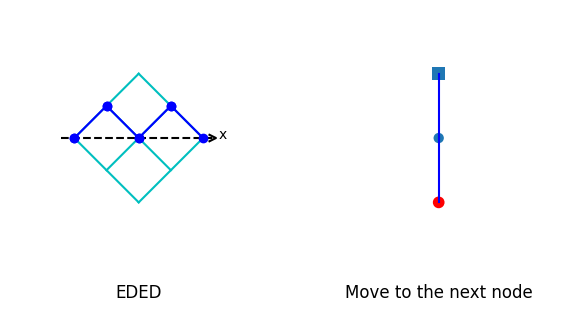

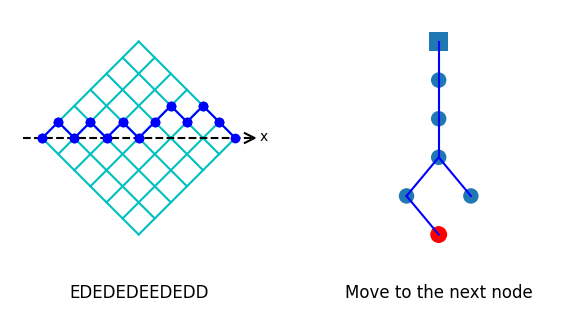

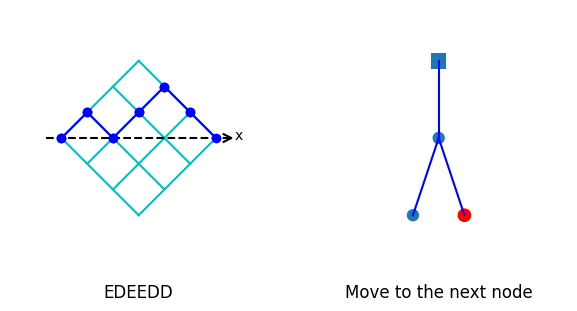

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patch
from IPython.display import display,clear_output
import ipywidgets as widgets
import time
from collections import Counter

class DyckPath:
    def __init__(self, path : np.ndarray = np.array([])):
        self.path = path

    def __str__(self):
        return str(self.path)
    
    def toCode(self):
        last = 0
        code = []
        for pos in self.path:
            code.append(pos-last)
            last = pos
        return DyckCode(np.array(code))


class DyckCode:
    def __init__(self, code : np.ndarray = np.array([])):
        self.code = code

    def __str__(self):
        return str(self.code)

    def toPath(self):
        last = 0
        path = []
        for move in self.code:
            path.append(move+last)
            last = path[-1]
        return DyckPath(np.array(path))

    @staticmethod
    def randomCode(length = 0):
        code = []
        pos,neg,check = 0,0,0
        for _ in range(length << 1):
            if check == 0:
                seed = 1
                check += 1
            else:
                seed = random.randint(0,1)
                check += (seed << 1) - 1
            if seed:
                pos += 1
                code.append(1)
                if pos == length:
                    code = code + [-1] * (length - neg)
                    break
            else:
                neg += 1
                code.append(-1)
                if neg == length:
                    code = code + [1] * (length - pos)
        return DyckCode(np.array(code))
    
def dyckPathFullBinaryTreeCor(change):
    l = random.randint(1,10)
    code = DyckCode.randomCode(l)
    path = code.toPath()
    dyckCode_UR = ''.join([{1:'E',-1:'D'}[d] for d in code.code])
    with output_widget:
        fig = plt.figure(figsize=(6, 3), layout="constrained")
        axs = fig.subplots(1, 2)
        for ax in axs:
            ax.set_xlim(-2,2*l+2)
            ax.set_ylim(-l-2,l+2)
        for _ in range(l+1):
            axs[0].plot(np.arange(0,l+1,1) + _,np.arange(0,l+1,1) - _,'c')
            axs[0].plot(np.arange(0,l+1,1) + _,np.arange(0,-l-1,-1) + _,'c')
        
        plt.title(f"For Dyck code of length {2*l}: {dyckCode_UR}")
        axs[0].set_aspect('equal')
        axs[0].plot(np.array([-0.2*l,2.2*l]),np.array([0,0]),'k--')
        axs[0].plot(np.array([2.1*l,2.2*l,2.1*l]),np.array([-0.05*l,0,0.05*l]),'k')
        axs[0].text(2.3*l,0.1,'x',va= 'center',ha='center')
        axs[1].set_aspect('equal')
        axs[1].set_axis_off()
        axs[0].set_axis_off()
        axs[0].plot(np.array([0]),np.array([0]),'bo')
        
        depth = [0]
        par = {}
        queue = []
        now = 0
        for key in dyckCode_UR:
            if key == 'E':
                queue.append(len(depth))
                new = len(depth)
                depth.append(depth[now] + 1)
                par[new] = now
            else:
                now = queue.pop(0)
        countLevel = Counter(depth)
        width = []
        for d in countLevel:
            hspace = 2 * l / (countLevel[d] + 1)
            for _ in range(countLevel[d]):
                width.append((_ + 1) * hspace )
        vspace = 2 * l / max(depth)
        
        cir = patch.Rectangle((width[0]-0.1*l,l-0.1*l),0.2*l,0.2 *l)
        nowNode = patch.Rectangle((width[0]-0.1*l,l-0.1*l),0.2*l,0.2 *l,color='r')
        axs[1].add_artist(cir)
        axs[1].add_artist(nowNode)
        
        clear_output(wait=True)
        display(fig)
        time.sleep(2)
        y = [0] + path.path.tolist()
        z = 0
        z1 = 0
        for x in range(1,2*l + 1):
            axs[0].plot(np.array([x-1,x]),np.array([y[x-1],y[x]]),'b',marker='o')
            axs[0].set_title(dyckCode_UR[:x],y=-0.15)
            if dyckCode_UR[x-1] == 'E':
                z += 1
                axs[1].set_title('Create a child',y=-0.15)
                cir = patch.Circle((width[z],l - vspace * depth[z]),0.08*l)
                x1 = par[z]
                axs[1].add_artist(cir)
                axs[1].plot(np.array([width[z],width[x1]]),np.array([l - vspace * depth[z],l - vspace * depth[x1]]),'b')
            else:
                z1 += 1
                axs[1].set_title('Move to the next node',y=-0.15)
                nowNode.remove()
                nowNode = patch.Circle((width[z1],l - vspace * depth[z1]),0.08*l,color = 'r')
                axs[1].add_artist(nowNode)
            clear_output(wait=True)
            display(fig)
            time.sleep(1)
            
        
    


button = widgets.Button(description="Random Dyck code")
output_widget = widgets.Output()

display(button)

button.on_click(dyckPathFullBinaryTreeCor)
display(output_widget)


        